<h1> Découverte des Données </h1>

In [1]:
import os #Mannipuler et explorer plusieurs fichier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Collecter les datatsets 
files = [file for file in os.listdir(r'E:/IA & Big Data/Data Analysis/Analyse de Vente Société/Sales_Data')]
for file in files:
    print(file)

2019_Sales.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
chemin = r'E:/IA & Big Data/Data Analysis/Analyse de Vente Société/Sales_Data'
Donnees = pd.DataFrame() #Création de Base de données vide

for file in files :
    current_data = pd.read_csv(chemin + '/' + file)
    Donnees = pd.concat([Donnees, current_data])
    
print(Donnees)

      Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
1          NaN                         NaN              NaN        NaN   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
11681   259353      AAA Batteries (4-pack)                3       2.99   
11682   259354                      iPhone                1        700   
11683   259355                      iPhone                1        700   
11684   259356      34in Ultrawide Monitor                1     379.99   
11685   259357        USB-C Charging Cable                1      11.95   

           Order Date                         Purchase Address  
0      04/19/19 08:46             917 1st St, 

In [4]:
Donnees.to_csv(chemin+'/2019_Sales.csv', index=False) 
#Creation d'un fichier csv contenant toutes les données concactener

In [5]:
#Verifier si il y a des valeur manquantes 
Donnees.isnull().sum()
#On peut voir qu'il y a 545 valeurs manquantes et comme nous disposont de 186850 données, on peut les supprimer
Donnees = Donnees.dropna(how='all')
Donnees.shape

(1490440, 6)

<h1><b> 1- <u>Quel est le mois durant lequel nous avons realiser le meilleur chiffre ?</u></b></h1>

In [6]:
#pour realiser cela il faudra isoler le mois de la date qui est dans ['Order Date']
def mois(x) :
    return x.split('/')[0]
#mois('04/19/19 08:46') ==> ['04', '19', '19 08:46'] ----> sa c'est pour x.split('/')
Donnees['Mois'] = Donnees['Order Date'].apply(mois) #Ajout d'un champs mois creer a partir de la fonction mois


Donnees['Mois'].unique() ###---> En Sql fonction Distinct
Donnees = Donnees[Donnees['Mois'] != 'Order Date'] #Pour Eliminer 'Order Date' de l'affichage des unique  


Donnees.dtypes #----> Pour voir le type de données de chaque champs 
#On constate que Mois est en 'Object', il faurt donc le mettre en, entier 
Donnees['Mois'] = Donnees['Mois'].astype(int)
Donnees.dtypes

Donnees


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mois
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [7]:
Donnees['Price Each'] = Donnees['Price Each'].astype(float)
Donnees['Quantity Ordered'] = Donnees['Quantity Ordered'].astype(int)

Donnees['Vente'] = Donnees['Price Each'] * Donnees['Quantity Ordered']

v = Donnees.groupby('Mois')['Vente'].sum() #----> somme des ventes grouper par Mois
print(v)

print('le plus grand chiffre de vente est : ',max(v)) 

Mois
1     14578053.84
2     17616179.36
3     22456803.04
4     27125361.92
5     25220854.00
6     20622418.08
7     21182206.08
8     17955743.04
9     16780481.04
10    29893815.04
11    25596825.60
12    36907546.72
Name: Vente, dtype: float64
le plus grand chiffre de vente est :  36907546.72


<function matplotlib.pyplot.show(close=None, block=None)>

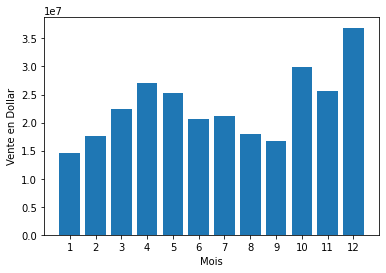

In [8]:
mois = range(1, 13)
plt.bar(mois, Donnees.groupby('Mois')['Vente'].sum())
plt.xticks(mois)
plt.xlabel('Mois')
plt.ylabel('Vente en Dollar')
plt.show

<h1><b> 2- <u>Dans quel ville nous avons enregistrer un maximum de commandes ?</u></b></h1>

<function matplotlib.pyplot.show(close=None, block=None)>

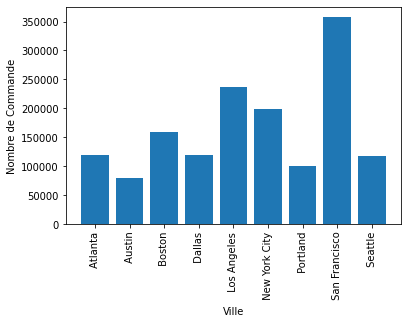

In [9]:
#pour realiser cela il faudra isoler la ville de l'adresse
def ville(x) :
    return x.split(',')[1]
Donnees['Ville'] = Donnees['Purchase Address'].apply(ville) #Ajout d'un champs mois creer a partir de la fonction mois

Donnees['Ville'].unique() ###---> En Sql fonction Distinct

Donnees.groupby('Ville')['Ville'].count() #compter commande par ville

vil_in = Donnees.groupby('Ville')['Ville'].count().index
vi = Donnees.groupby('Ville')['Ville'].count()
plt.bar(vil_in, vi)
plt.xticks(rotation='vertical')
plt.xlabel('Ville')
plt.ylabel('Nombre de Commande')
plt.show

<h1><b> 3- <u>En quelle moment (Quand) doit on faire une compagne publicitaire pour avoir plus de ventes ?</u></b></h1>

In [10]:
Donnees['Heure'] = pd.to_datetime(Donnees['Order Date']).dt.hour #creer un champ heure a l'aide de la table 'Order Date' ; Utilisation de fonction temporelle 

In [11]:
cles = []
heures = []
for cle, heure in Donnees.groupby('Heure'): 
    cles.append(cle)
    heures.append(len(heure))
heures

[31280,
 18800,
 9944,
 6648,
 6832,
 10568,
 19856,
 32088,
 50048,
 69984,
 87552,
 99288,
 100696,
 97032,
 87872,
 81400,
 83072,
 87192,
 98240,
 103240,
 97824,
 87368,
 70576,
 50200]

Text(0, 0.5, 'Nombre de Commande')

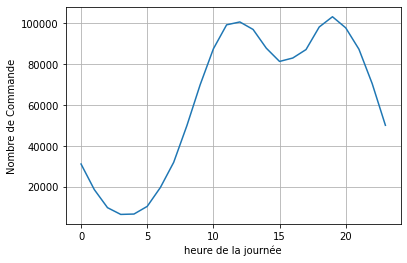

In [12]:
plt.grid()
plt.plot(cles, heures)
plt.xlabel('heure de la journée')
plt.ylabel('Nombre de Commande')

A partir du graphe on voit que c'est entre ~ 12h et 19h qu'il y a un maximum de commande </br>
Donc cet intervalle peut etre un bon moment pour le lancement d'une campagne publicitaire 

<h1><b> 4- <u>Quel Produit se vend plus ?</u></b></h1>

<AxesSubplot:xlabel='Product'>

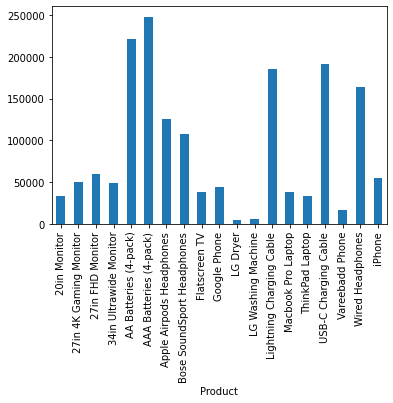

In [22]:
Donnees.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')


 1-1 Examniner l'impact du prix Pour comprendre pourquoi certains produits se vendent plus

In [14]:
Donnees.groupby('Product')['Price Each'].mean() #----> Moyenne des prix par produits 

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [15]:
Produit = Donnees.groupby('Product')['Quantity Ordered'].sum().index
Quantite = Donnees.groupby('Product')['Quantity Ordered'].sum()
Prix = Donnees.groupby('Product')['Price Each'].mean()


C:\Users\CARLEL~1\AppData\Local\Temp/ipykernel_12992/2172598457.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Produit, rotation='vertical', size=9)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 10800x7200 with 0 Axes>

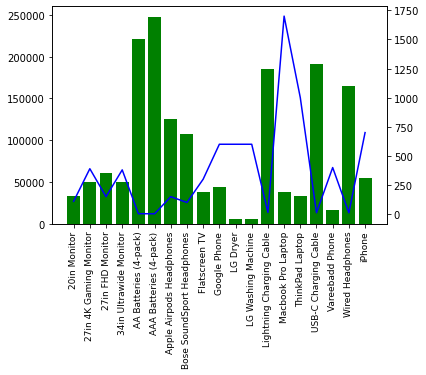

In [16]:
plt.figure(figsize=(150,100))
plt,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(Produit, Quantite, color='g')
ax2.plot(Produit, Prix, 'b-')
ax1.set_xticklabels(Produit, rotation='vertical', size=9)

On remarque que plus le prix est bas, plus la quantité commandé est élévé

<h1><b> 5- <u>Quel est la combinaison des produits qui est le plus vendu</u></b></h1>

<u>En dautre mot</u> : Quel sont les produits combiné qui sont trés achetés par les clients 

In [17]:
#Recherche de combinaison a partir de de l'ID car un un panier pour plusieurs produits (ID pour plusieur produits)
df = Donnees[Donnees['Order ID'].duplicated(keep=False)] 

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) #faire groupe par panier pour ID 

df2 = df.drop_duplicates(subset=['Order ID']) #eliminer les doublons qui ont les memes groupages

df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mois,Vente,Ville,Heure,Grouped
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,"Wired Headphones,Wired Headphones,Wired Headph..."
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco,13,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20,"AAA Batteries (4-pack),AAA Batteries (4-pack),..."
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16,"iPhone,iPhone,iPhone,iPhone,iPhone,iPhone,iPho..."
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7,"iPhone,iPhone,iPhone,iPhone,iPhone,iPhone,iPho..."
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17,"34in Ultrawide Monitor,34in Ultrawide Monitor,..."


<AxesSubplot:ylabel='Grouped'>

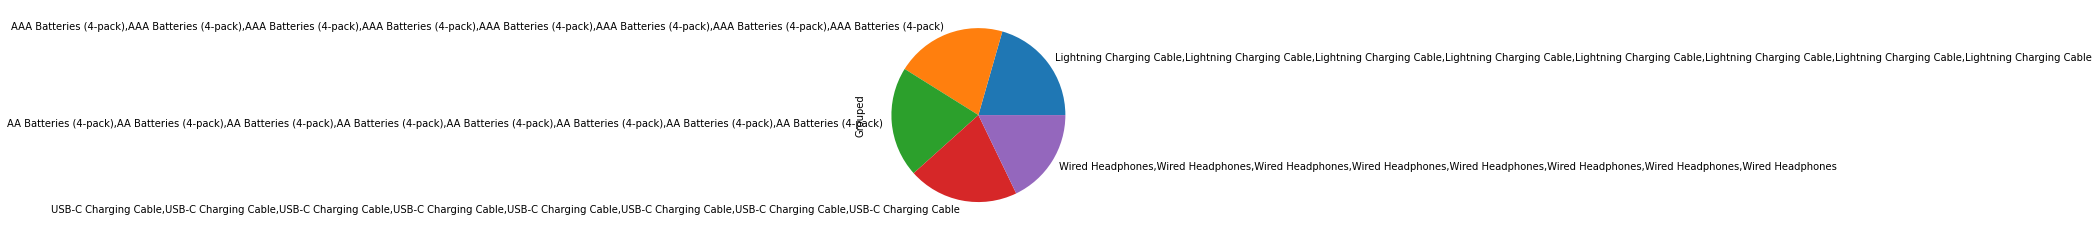

In [18]:
df2['Grouped'].value_counts() #Pour voir les combinaison très acheté
df2['Grouped'].value_counts()[0:6] #6 combinaison très acheté
df2['Grouped'].value_counts()[0:5].plot.pie() #Diagramme par secteur